# Banknote Authentication Classification

### Kouretas Panagtiotis-Theodoros E19072

In this notebook, we will be working with a dataset that contains information extracted from images of genuine and forged banknote-like specimens. The data were digitized using an industrial camera typically used for print inspection. The images have a resolution of about 660 dpi.

The dataset contains the following features:

1. Variance of Wavelet Transformed image (continuous)
2. Skewness of Wavelet Transformed image (continuous)
3. Curtosis of Wavelet Transformed image (continuous)
4. Entropy of image (continuous)
5. Class (integer)

The 'Class' feature is our target variable. It indicates whether the banknote is genuine or forged.

We will apply various classification algorithms to this dataset and compare their performance. The goal is to determine which algorithm is most effective for this particular task.

At first we start by importing the necessary libraries and loading the dataset (the dataset is converted from .txt to .csv form).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# URL of the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'

# Column names for the dataset
column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Load the dataset
df = pd.read_csv(url, names=column_names)

## Data Exploration

Now that we have loaded the data, let's take a look at the first few rows to understand its structure.

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df['class'].value_counts()

In [ ]:
df.describe()

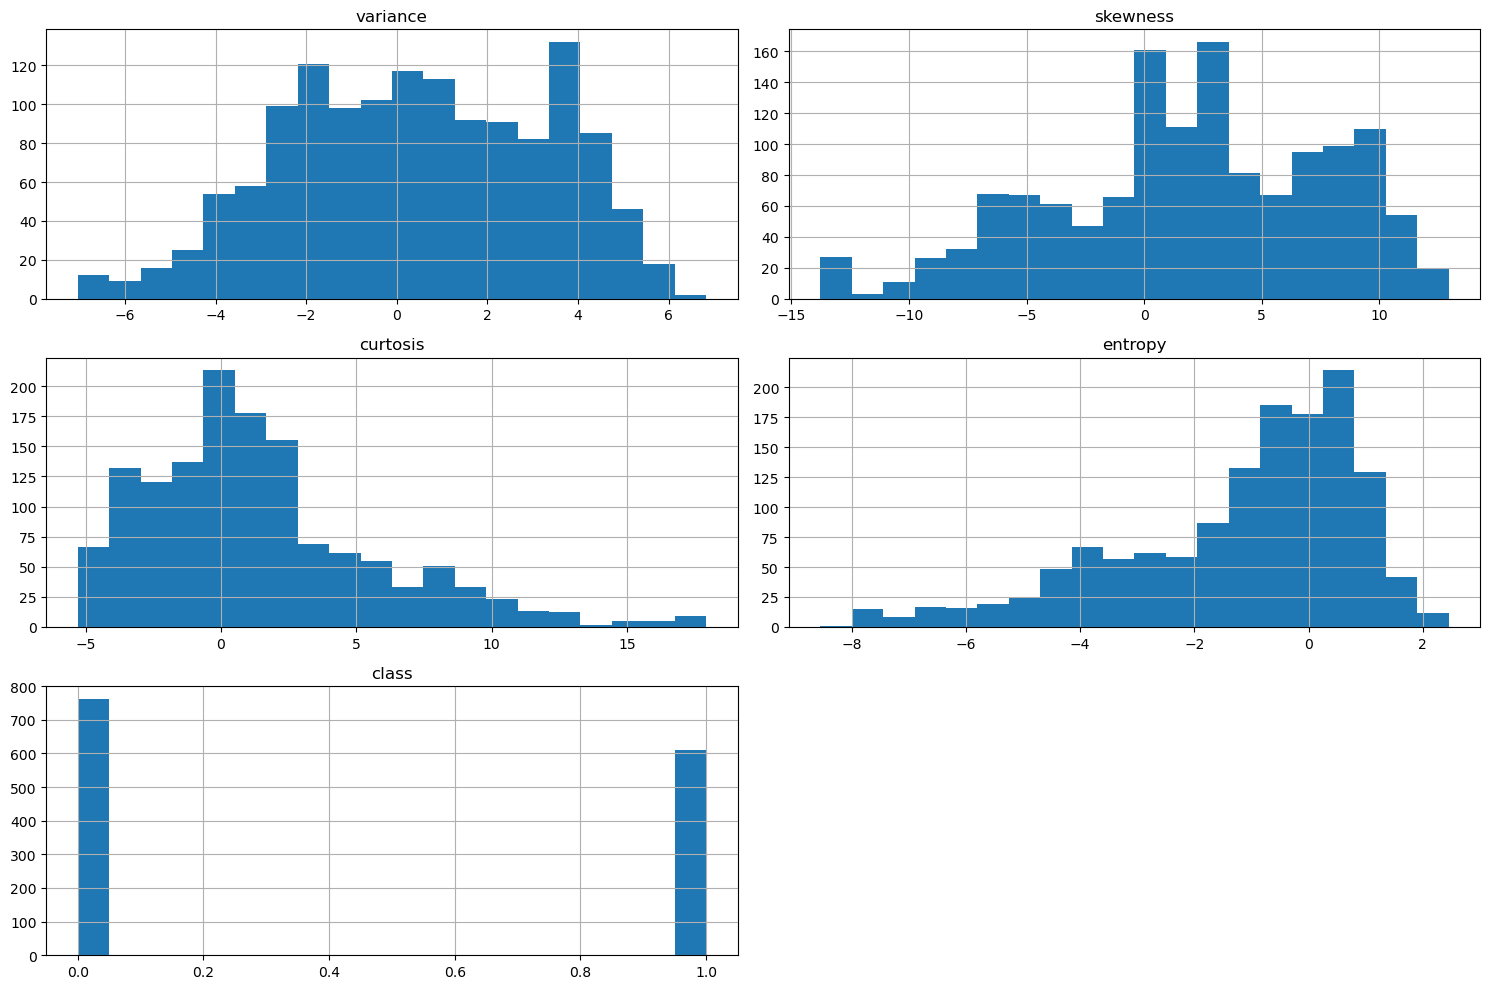

In [ ]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

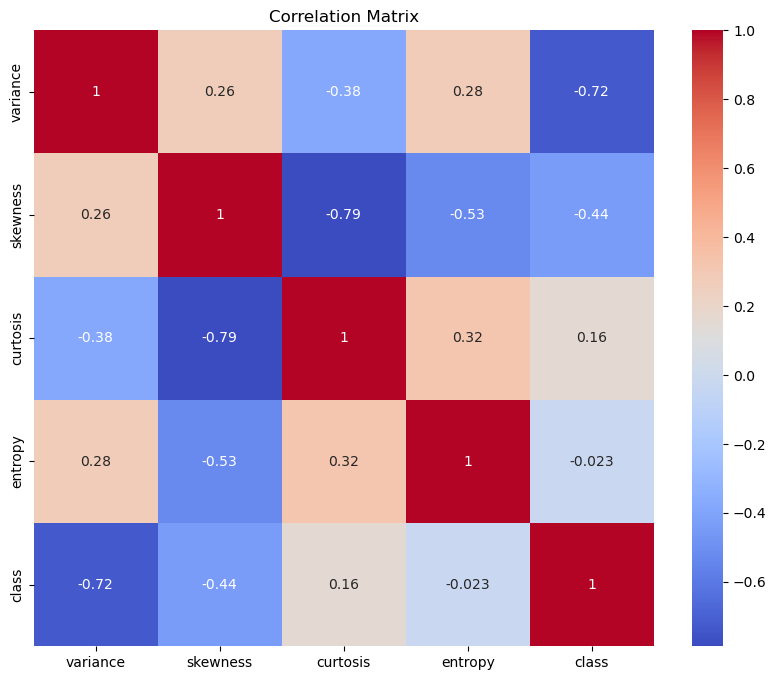

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In the code below, we are preparing our data for the machine learning models.

1. We first separate our data into features (X) and target (y). The features are all the columns except 'class', which is our target. The 'drop' function is used to remove the 'class' column from the DataFrame, and the result is stored in X. The 'class' column is stored in y.

2. We then split our data into training and test sets. The 'train_test_split' function from sklearn.model_selection is used for this purpose. We pass in our features and target, and specify that we want 20% of the data to be in the test set (test_size=0.2). We also set the random_state to 42 for reproducibility. The function returns four outputs: X_train, X_test, y_train, y_test. X_train and y_train are the features and target for the training set, and X_test and y_test are the features and target for the test set.

5. We initialize the StandardScaler. This is a utility from sklearn.preprocessing that standardizes features by removing the mean and scaling to unit variance.

6. We fit the StandardScaler on our training data. This calculates the mean and standard deviation of the data, which will be used for scaling.

7. We transform our training and test data using the fitted scaler. This subtracts the mean and divides by the standard deviation for each feature in the data.


By splitting our data into a training set and
a test set, we can train our model on the training set and then evaluate its performance on the test set. This gives us an estimate of how well our model is likely to perform. Also with scaling the data is an important step in many machine learning algorithms. It ensures that all features have the same scale, which can lead to better performance.


In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now that we prepared our data, we will test, evaluate and compare different classification algorithms on our dataset.

In the code below, we are applying the Logistic Regression algorithm to our data.

Logistic Regression steps:

1. We first import the LogisticRegression from sklearn.linear_model witch is is the implementation of the Logistic Regression algorithm in scikit-learn.

2. We then initialize the model with the default parameters. We set the random_state to 42 for reproducibility.

3. We train the model on our training data using the fit method. This is where the model learns the relationships between the features and the target.

4. We use the trained model to make predictions on our test data. The predict method takes the test features as input and returns the predicted target values.

5. We calculate the accuracy of our model by comparing the predicted target values to the actual target values in the test set. The accuracy_score function from sklearn.metrics is used for this purpose.

6. We print the accuracy of our model.

7. Finally, we generate a classification report, which provides detailed metrics about our model's performance. The classification_report function from sklearn.metrics is used for this purpose. The report includes metrics such as precision, recall, and f1-score for each class, as well as the overall accuracy of the model.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Calculate the accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Print the accuracy
print('Accuracy of Logistic Regression: ', accuracy_log_reg)

# Generate and print the classification report
print(classification_report(y_test, y_pred_log_reg))

Accuracy of Logistic Regression:  0.9781818181818182
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Calculate the accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracy
print('Accuracy of Decision Tree: ', accuracy_dt)

# Generate and print the classification report
print(classification_report(y_test, y_pred_dt))

Accuracy of Decision Tree:  0.9818181818181818
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       148
           1       1.00      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In the code below, we are applying the Random Forest algorithm to our data.

Random Forest steps:

1. We first import the RandomForestClassifier from sklearn.ensemble. This is the implementation of the Random Forest algorithm in scikit-learn.

2. We then initialize the model with the default parameters. We set the random_state to 42 for reproducibility.

3. We train the model on our training data using the fit method. This is where the model learns the relationships between the features and the target.

4. We use the trained model to make predictions on our test data. The predict method takes the test features as input and returns the predicted target values.

5. We calculate the accuracy of our model by comparing the predicted target values to the actual target values in the test set. The accuracy_score function from sklearn.metrics is used for this purpose.

6. We print the accuracy of our model.

7. Finally, we generate a classification report as we did in the previous classification algorithms. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracy
print('Accuracy of Random Forest: ', accuracy_rf)

# Generate and print the classification report
print(classification_report(y_test, y_pred_rf))

Accuracy of Random Forest:  0.9927272727272727
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In the code below, we are applying the Support Vector Machine (SVM) algorithm to our data. 

Support Vector Machine (SVM) steps:

1. We first import the SVC (Support Vector Classification) from sklearn.svm. This is the implementation of the SVM algorithm in scikit-learn.

2. We then initialize the model with the default parameters. We set the random_state to 42 for reproducibility.

3. We train the model on our training data using the fit method. This is where the model learns the relationships between the features and the target.

4. We use the trained model to make predictions on our test data. The predict method takes the test features as input and returns the predicted target values.

5. We calculate the accuracy of our model by comparing the predicted target values to the actual target values in the test set. The accuracy_score function from sklearn.metrics is used for this purpose.

6. We print the accuracy of our model.

7. Finally, we generate a classification report as we did in the previous classification algorithms. 

In [ ]:
from sklearn.svm import SVC

# Initialize the model
svc = SVC(random_state=42)

# Train the model
svc.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc.predict(X_test)

# Calculate the accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Print the accuracy
print('Accuracy of Support Vector Machine: ', accuracy_svc)

# Generate and print the classification report
print(classification_report(y_test, y_pred_svc))

Accuracy of Support Vector Machine:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In the code below, we are applying the K-Nearest Neighbors (KNN) algorithm to our data.

K-Nearest Neighbours steps:

1. We first import the KNeighborsClassifier from sklearn.neighbors. This is the implementation of the KNN algorithm in scikit-learn.

2. We then initialize the model with the default parameters.

3. We train the model on our training data using the fit method. This is where the model learns the relationships between the features and the target.

4. We use the trained model to make predictions on our test data. The predict method takes the test features as input and returns the predicted target values.

5. We calculate the accuracy of our model by comparing the predicted target values to the actual target values in the test set. The accuracy_score function from sklearn.metrics is used for this purpose.

6. We print the accuracy of our model.

7. Finally, we generate a classification report as we did in the previous classification algorithms. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the accuracy
print('Accuracy of K-Nearest Neighbors: ', accuracy_knn)

# Generate and print the classification report
print(classification_report(y_test, y_pred_knn))

Accuracy of K-Nearest Neighbors:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In the code below, we are comparing the performance of our models.

We first create a DataFrame to hold the results. This DataFrame has two columns: 'Model' and 'Accuracy'. The 'Model' column contains the names of our models, and the 'Accuracy' column contains the corresponding accuracy scores.We then sort the DataFrame by the 'Accuracy' column in descending order. This allows us to easily see which model performed the best. We print the DataFrame to display the results.

The output is a table that shows the accuracy of each model, sorted from highest to lowest. This allows us to easily compare the performance of our models and select the best one.



In [ ]:
# Create a dataframe to hold the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors'],
    'Accuracy': [accuracy_log_reg, accuracy_dt, accuracy_rf, accuracy_svc, accuracy_knn]
})

# Sort the results by the accuracy
results = results.sort_values(by='Accuracy', ascending=False)

# Print the results
results

## SUMMARY

Based on the accuracy results, the Support Vector Machine (SVM) and K-Nearest Neighbors (KNN) models achieved the highest accuracy of 100%. This means that they correctly classified all the banknotes in the test set as genuine or forged.

The Random Forest model performed with an accuracy of 99.27%. The Decision Tree and Logistic Regression models had slightly lower accuracies of approximately 98.18% and 97.82% respectively.

The reason for these results are attributed to the nature of the dataset and the characteristics of the algorithms. SVM and KNN are powerful algorithms that can capture complex relationships in the data. SVM, in particular, is effective in high-dimensional spaces as it is the case in our dataset with multiple features. KNN, on the other hand, is a type of instance-based learning that can adapt quickly to changes, making it effective for this dataset.

Random Forest, might not have been able to capture some small variations in the data that SVM and KNN could, resulting in a slightly lower accuracy. Decision Tree and Logistic Regression, while still having high accuracies, are considered simpler models and they are not performing as well on complex datasets.

However, it's important to note that accuracy isn't the only metric we should consider when evaluating the performance of a model. Depending on the problem at hand, other metrics such as precision, recall, or the F1 score might be more relevant. In this case, since we're dealing with a binary classification problem and our classes are relatively balanced, accuracy is concidered as the most important metric.

### Sources 

- Data Analysis Lecture and Lab's Slides 

- Data Science Full course series from Youtube's chanel Simple learn : https://www.youtube.com/@SimplilearnOfficial

- https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501

- https://www.youtube.com/watch?v=e-lHu0U9UY4

- https://www.youtube.com/watch?v=pXdum128xww


 